In [68]:
import numpy as np
from matplotlib import pyplot as plt
import sys
from scipy.integrate import odeint
from scipy.interpolate import interp1d

In [69]:
def sech(x):
    return 1/np.cosh(x)

def rhoDD(z, sigmaDD, hDD):
    return sigmaDD/(4*hDD)*sech(z/(2*hDD))**2

def rho_tot1(phi, rho1, sigmaz1, R=3.4E-3):
    return rho1*np.exp(-phi/sigmaz1**2) - R

G = 4.30091E-3 # pc/M_sun (km/s)^2

def velocity(u, z, rho1, sigmaz1, R=3.4E-3):
    return (u[1], 4*np.pi*G*rho_tot1(u[0], rho1, sigmaz1, R))

In [73]:
# Test
phi0 = 0 # (km/s)^2
Kz0 = 0 # pc (km/s)^2

y0 = [Kz0, phi0]
zs = np.linspace(0, 1000, 1000)

rho1 = 0.0104 # Msun/pc^3
sigmaz1 = 3.7 # km/s
# R = 3.4E-3 # Msun/pc^3
R = 0
us = odeint(velocity, y0, zs, args=(rho1, sigmaz1, R))

In [76]:
def phi_b_func(z, rho1, sigmaz1):
    return sigmaz1**2 * np.log(np.cosh(np.sqrt(2*np.pi*G*rho1)/sigmaz1*z)**2)

def phi_exact(z, rho1, sigmaz1, R):
    return phi_b_func(z, rho1, sigmaz1) - 4*np.pi*G*R*z**2/2

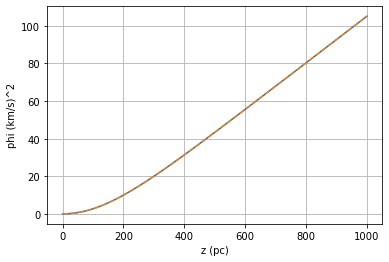

In [77]:
phi_b = us[:, 0]
plt.plot(zs, phi_b)
plt.plot(zs, phi_exact(zs, rho1, sigmaz1, R), "--")
plt.xlabel("z (pc)")
plt.ylabel("phi (km/s)^2")
# plt.xlim(0, zs[-1])
# plt.ylim(0, phi[-1]*1.2)
plt.grid()

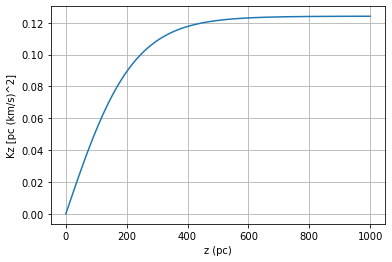

In [78]:
Kz = us[:, 1]
plt.plot(zs, Kz)
plt.xlabel("z (pc)")
plt.ylabel("Kz [pc (km/s)^2]")
plt.grid()
# plt.xlim(0, zs[-1])
# plt.ylim(0, Kz[-1]*1.2)

In [79]:
# Test
phi0 = 0 # (km/s)^2
Kz0 = 0 # pc (km/s)^2

y0 = [Kz0, phi0]
zs = np.linspace(0, 1000, 1000)

rho1 = 0.0 # Msun/pc^3
sigmaz1 = 3.7 # km/s
R = 3.4E-3 # Msun/pc^3
# R = 0
us = odeint(velocity, y0, zs, args=(rho1, sigmaz1, R))

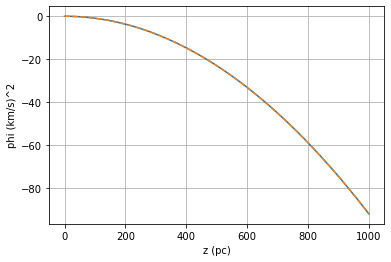

In [80]:
phi_r = us[:, 0]
plt.plot(zs, phi_r)
plt.plot(zs, phi_exact(zs, rho1, sigmaz1, R), "--")
plt.xlabel("z (pc)")
plt.ylabel("phi (km/s)^2")
# plt.xlim(0, zs[-1])
# plt.ylim(0, phi[-1]*1.2)
plt.grid()

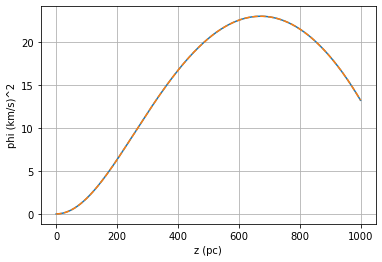

In [81]:
rho1 = 0.0104 # Msun/pc^3
sigmaz1 = 3.7 # km/s
R = 3.4E-3 # Msun/pc^3

plt.plot(zs, phi_r+phi_b)
plt.plot(zs, phi_exact(zs, rho1, sigmaz1, R), "--")
plt.xlabel("z (pc)")
plt.ylabel("phi (km/s)^2")
plt.grid()

In [82]:
# Test
phi0 = 0 # (km/s)^2
Kz0 = 0 # pc (km/s)^2

y0 = [Kz0, phi0]
zs = np.linspace(0, 1000, 1000)

rho1 = 0.0104 # Msun/pc^3
sigmaz1 = 3.7 # km/s
R = 3.4E-3 # Msun/pc^3
# R = 0
us = odeint(velocity, y0, zs, args=(rho1, sigmaz1, R))

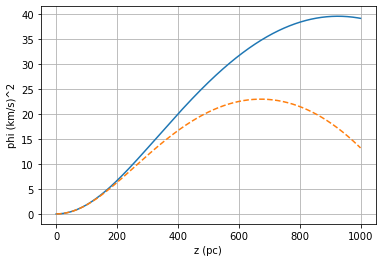

In [83]:
phi_b = us[:, 0]
plt.plot(zs, phi_b)
plt.plot(zs, phi_exact(zs, rho1, sigmaz1, R), "--")
plt.xlabel("z (pc)")
plt.ylabel("phi (km/s)^2")
# plt.xlim(0, zs[-1])
# plt.ylim(0, phi[-1]*1.2)
plt.grid()

# multi

In [87]:
def rho_tot(phi, rhob, sigmaz):
    rho = np.array(list(map(lambda par: par[0]*np.exp(-phi/par[1]**2), zip(rhob, sigmaz))))
    return rho.sum(axis=0)

G = 4.30091E-3 # pc/M_sun (km/s)^2

def velocity(u, z, rhob, sigmaz):
    return (u[1], 4*np.pi*G*rho_tot(u[0], rhob, sigmaz))

In [99]:
# Test
phi0 = 0 # (km/s)^2
Kz0 = 0 # pc (km/s)^2

y0 = [Kz0, phi0]
zs = np.linspace(0, 1000, 1000)

# rhob = np.array([0.0104, 0.02]) # Msun/pc^3
# sigmaz = np.array([3.7, 4.5]) # km/s

rhob = np.array([0.0104, 0.001]) # Msun/pc^3
sigmaz = np.array([3.7, 4.5]) # km/s

us = odeint(velocity, y0, zs, args=(rhob, sigmaz))

In [104]:
def phi_b_func(z, rho, sigmaz):
    return sigmaz**2 * np.log(np.cosh(np.sqrt(2*np.pi*G*rho)/sigmaz*z)**2)

def phi_exact(z, rhob, sigmaz):
    return np.array(list(map(lambda par: phi_b_func(z, par[0], par[1]), zip(rhob, sigmaz)))).sum(axis=0)

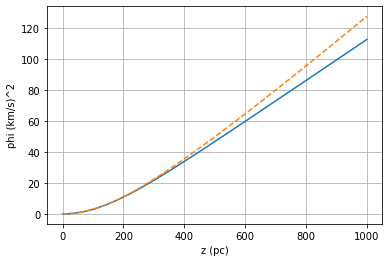

In [105]:
phi_r = us[:, 0]
plt.plot(zs, phi_r)
plt.plot(zs, phi_exact(zs, rhob, sigmaz), "--")
plt.xlabel("z (pc)")
plt.ylabel("phi (km/s)^2")
# plt.xlim(0, zs[-1])
# plt.ylim(0, phi[-1]*1.2)
plt.grid()

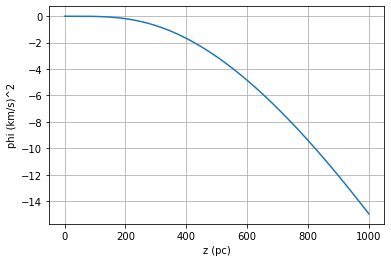

In [106]:
phi = us[:, 0]
plt.plot(zs, phi - phi_exact(zs, rhob, sigmaz))
plt.xlabel("z (pc)")
plt.ylabel("phi (km/s)^2")
# plt.xlim(0, zs[-1])
# plt.ylim(0, phi[-1]*1.2)
plt.grid()